In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import BatchNormalization
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size = 50
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/split_data_cnn/train/', classes = ["cat","dog","wild"],
                                              target_size=(150, 150), batch_size=batch_size,
                                              class_mode='categorical', shuffle=True)

Found 2824 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/split_data_cnn/val', classes = ["cat","dog","wild"],
                                            target_size=(150, 150), batch_size=batch_size,
                                            class_mode='categorical', shuffle=False)

Found 353 images belonging to 3 classes.


In [ ]:
#CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# dense 
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:
from keras.callbacks import History 
history = History()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                        

In [17]:
History = model.fit(train_set, validation_data = test_set, batch_size=batch_size,epochs=50,callbacks=[history])

Epoch 1/50
57/57 [==============================] - 731s 13s/step - loss: 1.4086 - accuracy: 0.4749 - val_loss: 0.9494 - val_accuracy: 0.7167
Epoch 2/50
57/57 [==============================] - 277s 5s/step - loss: 1.0152 - accuracy: 0.5882 - val_loss: 1.1261 - val_accuracy: 0.7167
Epoch 3/50
57/57 [==============================] - 278s 5s/step - loss: 0.8105 - accuracy: 0.6686 - val_loss: 0.7280 - val_accuracy: 0.7167
Epoch 4/50
57/57 [==============================] - 277s 5s/step - loss: 0.6926 - accuracy: 0.7302 - val_loss: 1.9402 - val_accuracy: 0.7167
Epoch 5/50
57/57 [==============================] - 275s 5s/step - loss: 0.6135 - accuracy: 0.7613 - val_loss: 4.4749 - val_accuracy: 0.7167
Epoch 6/50
57/57 [==============================] - 273s 5s/step - loss: 0.5548 - accuracy: 0.7932 - val_loss: 1.6115 - val_accuracy: 0.7394
Epoch 7/50
57/57 [==============================] - 274s 5s/step - loss: 0.4766 - accuracy: 0.8152 - val_loss: 1.0323 - val_accuracy: 0.7564
Epoch 8/50
5

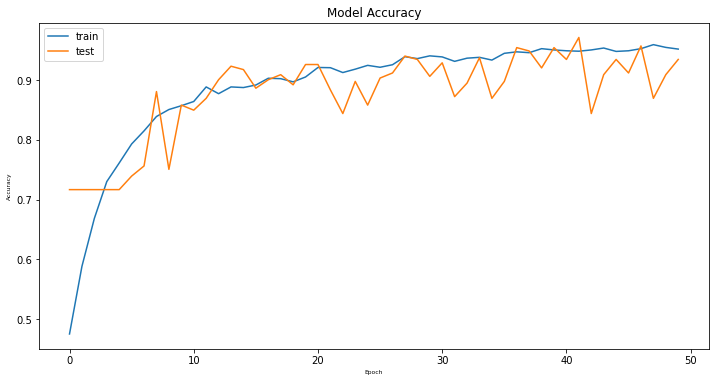

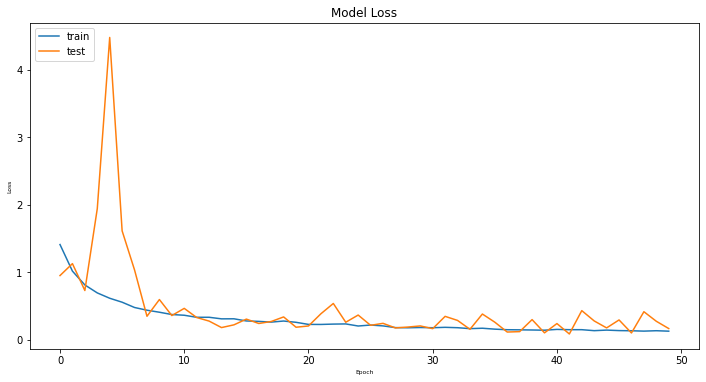

In [18]:
plt.figure(figsize=(12,6))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=12)
plt.ylabel('Accuracy', fontsize=6)
plt.xlabel('Epoch', fontsize=6)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(12,6))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=12)
plt.ylabel('Loss',fontsize=6)
plt.xlabel('Epoch',fontsize=6)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [20]:
target_names = []
for key in train_set.class_indices:
  target_names.append(key)

print(target_names)

['cat', 'dog', 'wild']


In [21]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])

8/8 [==============================] - 8s 912ms/step - loss: 0.1648 - accuracy: 0.9348
n Test_Accuracy:- 0.9348441958427429


confusion matrix
[[253   0   0]
 [ 12  38   0]
 [  9   2  39]]


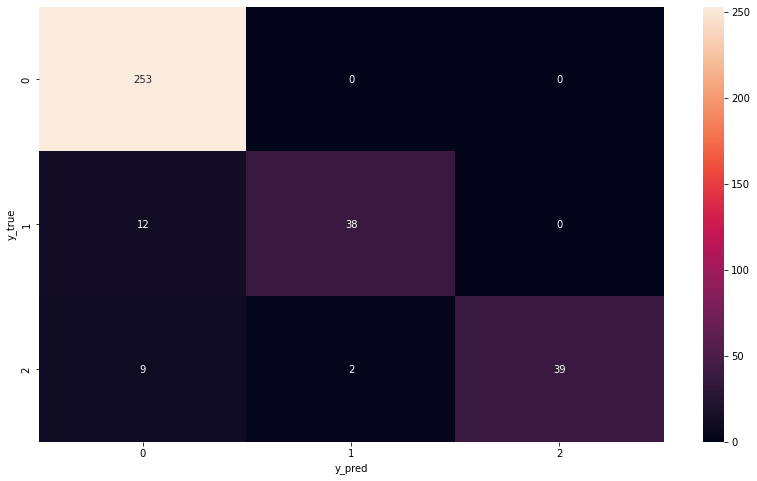

In [22]:
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [23]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

         cat       0.92      1.00      0.96       253
         dog       0.95      0.76      0.84        50
        wild       1.00      0.78      0.88        50

    accuracy                           0.93       353
   macro avg       0.96      0.85      0.89       353
weighted avg       0.94      0.93      0.93       353

